In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as numpy

In [2]:
data = pd.read_csv("customer_churn_dataset-training-master.csv")
df = pd.DataFrame(data)

In [3]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [4]:
df = df.drop(columns = 'CustomerID')

### Initial Analysis

In [5]:
list(df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [6]:
new_column_names = {col : col.replace(' ', '_') for col in df.columns}
df = df.rename(columns = new_column_names)

In [7]:
list(df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage_Frequency',
 'Support_Calls',
 'Payment_Delay',
 'Subscription_Type',
 'Contract_Length',
 'Total_Spend',
 'Last_Interaction',
 'Churn']

#### Finding the null values

In [8]:
df.isna().sum()

Age                  1
Gender               1
Tenure               1
Usage_Frequency      1
Support_Calls        1
Payment_Delay        1
Subscription_Type    1
Contract_Length      1
Total_Spend          1
Last_Interaction     1
Churn                1
dtype: int64

In [10]:
df[df['Age'].isna()]

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(199295)
df = df.reset_index(drop = True)
df

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440827,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440828,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440829,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440830,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [12]:
df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage_Frequency      0
Support_Calls        0
Payment_Delay        0
Subscription_Type    0
Contract_Length      0
Total_Spend          0
Last_Interaction     0
Churn                0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage_Frequency    440832 non-null  float64
 4   Support_Calls      440832 non-null  float64
 5   Payment_Delay      440832 non-null  float64
 6   Subscription_Type  440832 non-null  object 
 7   Contract_Length    440832 non-null  object 
 8   Total_Spend        440832 non-null  float64
 9   Last_Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage_Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support_Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment_Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Total_Spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
Last_Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.0,1.0,1.0,1.0


## EDA 

### 1.Age Distribution and Churn Rate:
- What is the distribution of ages among your customers?

- Is there a relationship between age and churn rate?

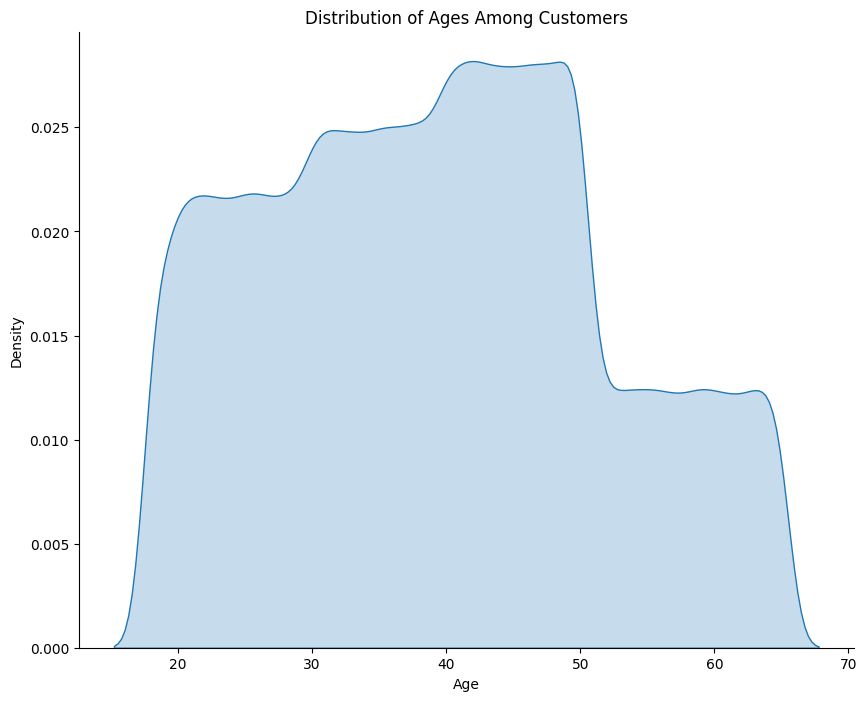

In [15]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data = df, x = df.Age, fill = True, common_norm= False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\2890973601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Churn', y = 'Age', data = df, palette='Set3')


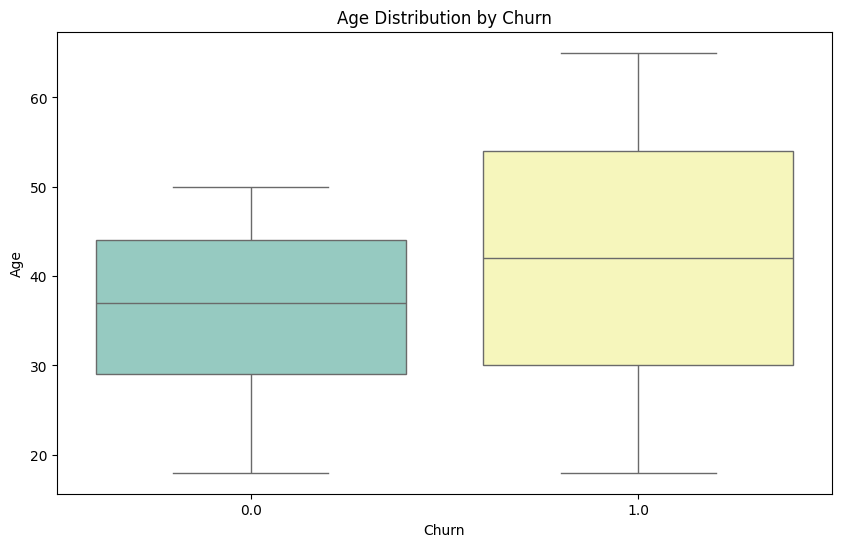

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Churn', y = 'Age', data = df, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

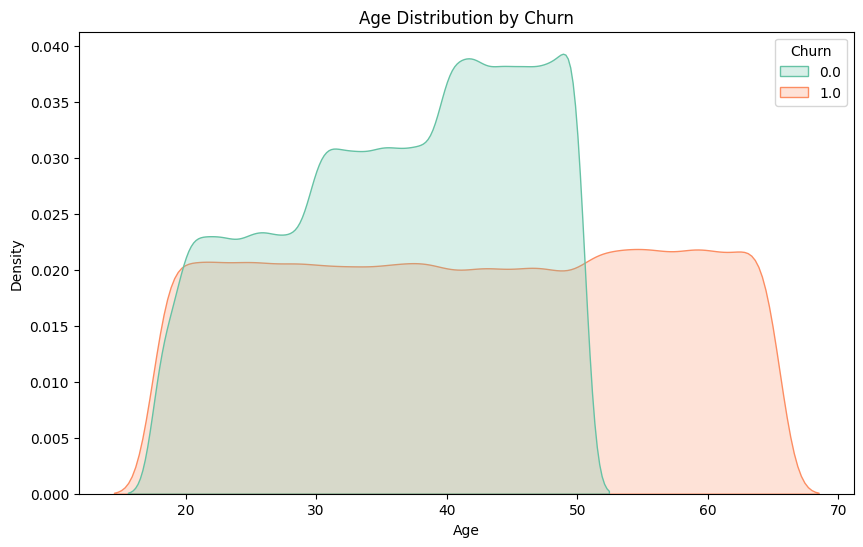

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data= df, x = 'Age', hue = 'Churn', common_norm= False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\480439079.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\480439079.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn_rate.index, y = age_churn_rate.values, palette='pastel')


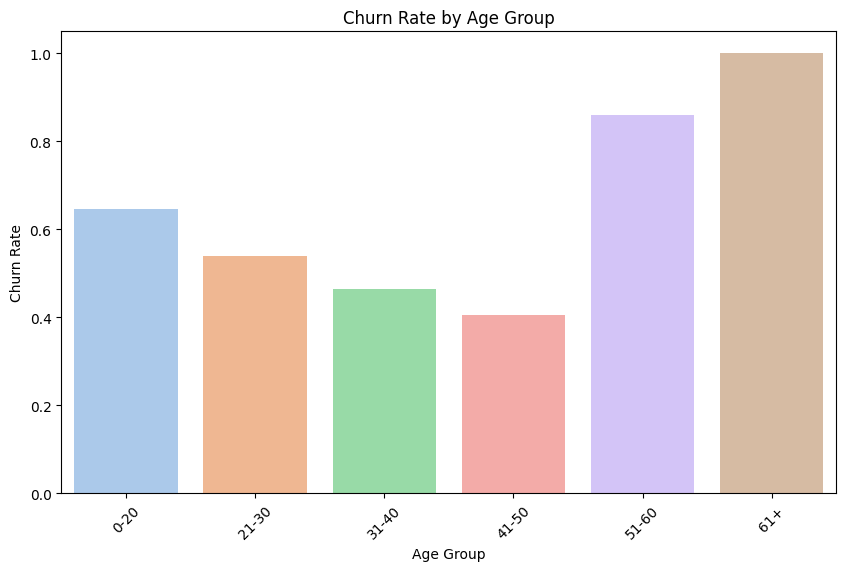

In [20]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins = age_bins, labels=age_labels, right=False)
age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y = age_churn_rate.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation = 45)
plt.show()

### Answers :
- Age is normally distributed but is slighlty positively skewed which means we have more younger Customers

- We have a significant number of customers in the 40-50 age range, with a smaller but still substantial group in the 20-30 age range

- as you can see almost half of the customers in the 20-30 group Churn but the churn rate drops for the next age groups until 41-50 age group

- Everyone who is older than 60 Churn!!!

### 2.Gender Analysis:
- What is the gender distribution of your customers?

- Is there any noticeable difference in churn rates between genders?

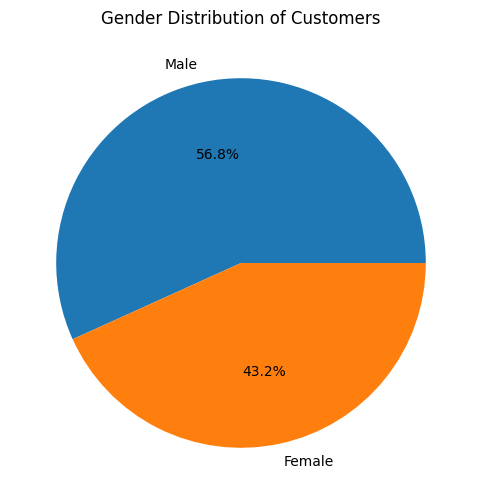

In [21]:
plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\1296248310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rate.index, y = gender_churn_rate.values, palette='Set2')


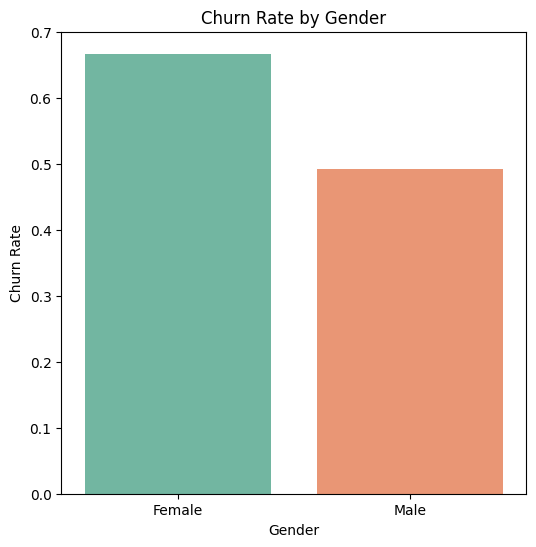

In [22]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y = gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

### Answers :
- More than half of the customers are Male

- BUT The churn rate of the female customers are much higher than the male customers

### 3.Tenure and Churn:
- How long, on average, have your customers been with your service (tenure)?

- Is there any pattern between tenure and churn?

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\3558564221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tenure', y = 'Tenure', data = df, estimator=lambda x: len(x) / len(df) * 100, palette='Blues')


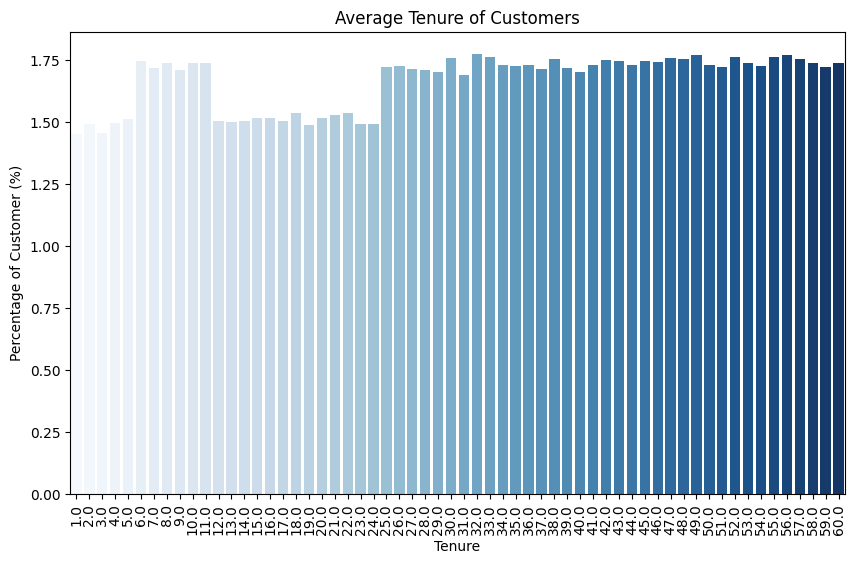

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y = 'Tenure', data = df, estimator=lambda x: len(x) / len(df) * 100, palette='Blues')
plt.xlabel('Tenure')
plt.ylabel('Percentage of Customer (%)')
plt.title('Average Tenure of Customers')
plt.xticks(rotation = 90)
plt.show()

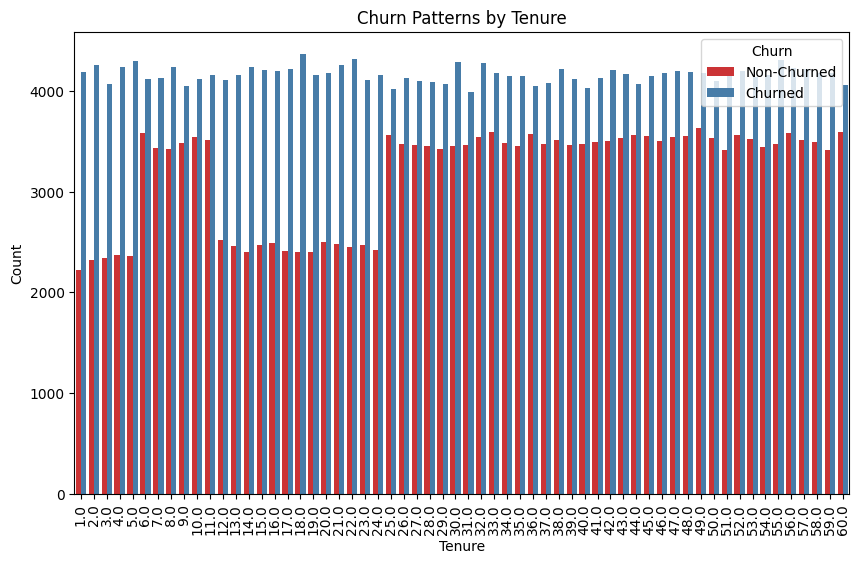

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', hue='Churn', data=df, palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn Patterns by Tenure')
plt.legend(title='Churn', labels=['Non-Churned', 'Churned'])
plt.xticks(rotation=90)
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\3125786845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Tenure', y='Churn', data=df, errorbar=None,  palette='Set2')


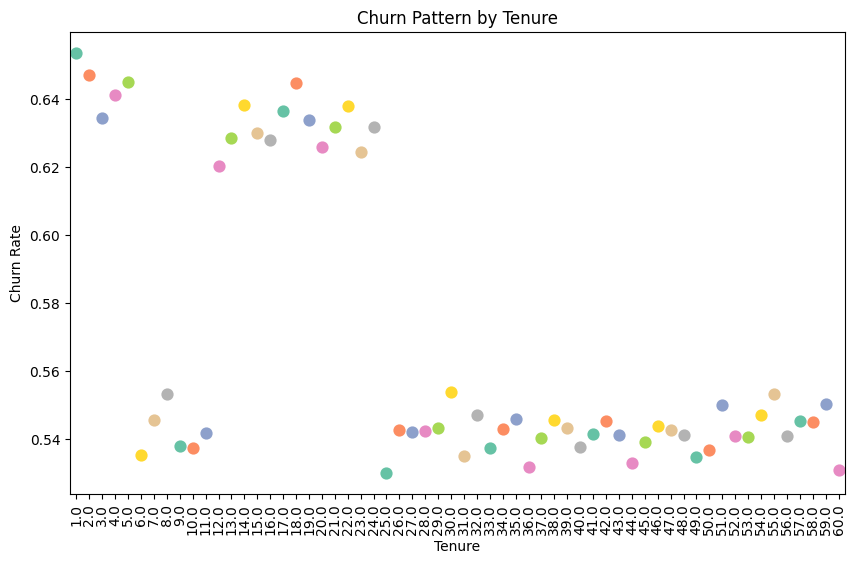

In [25]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Tenure', y='Churn', data=df, errorbar=None,  palette='Set2')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Tenure')
plt.xticks(rotation=90)
plt.show()

### Answers :
- we can see that we have custmores with almost equally distributed Tenures

- the churn rate in new customers(1-5 tenure) and 12 to 24 month tenure is higher than others

- the churn rate for other customers is almost half

### 4.Usage Frequency:
- How frequently do customers use your service, on average?

- Does usage frequency affect churn rates?

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\1743410065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Usage_Frequency', y='Usage_Frequency', data=df, estimator=lambda x: len(x) / len(df) * 100 , palette='Blues')


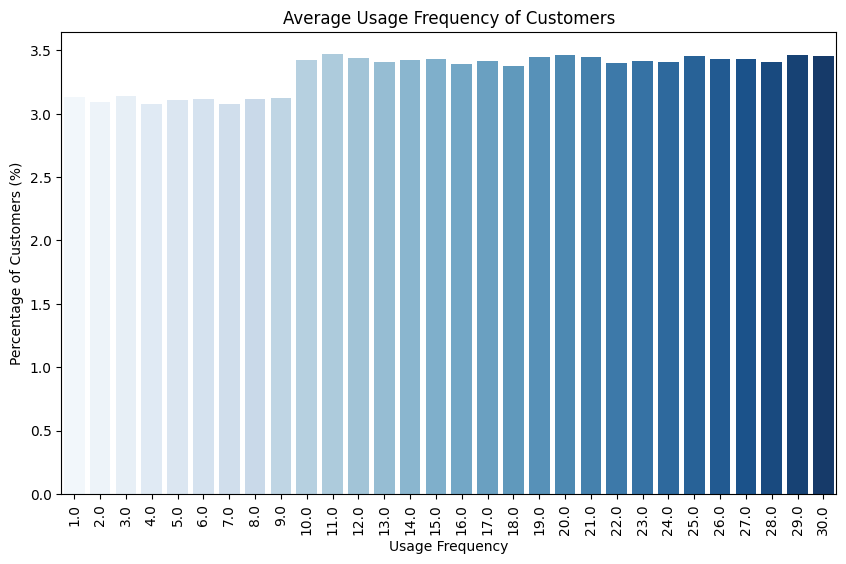

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Usage_Frequency', y='Usage_Frequency', data=df, estimator=lambda x: len(x) / len(df) * 100 , palette='Blues')
plt.xlabel('Usage Frequency')
plt.ylabel('Percentage of Customers (%)')
plt.title('Average Usage Frequency of Customers')
plt.xticks(rotation=90)
plt.show()

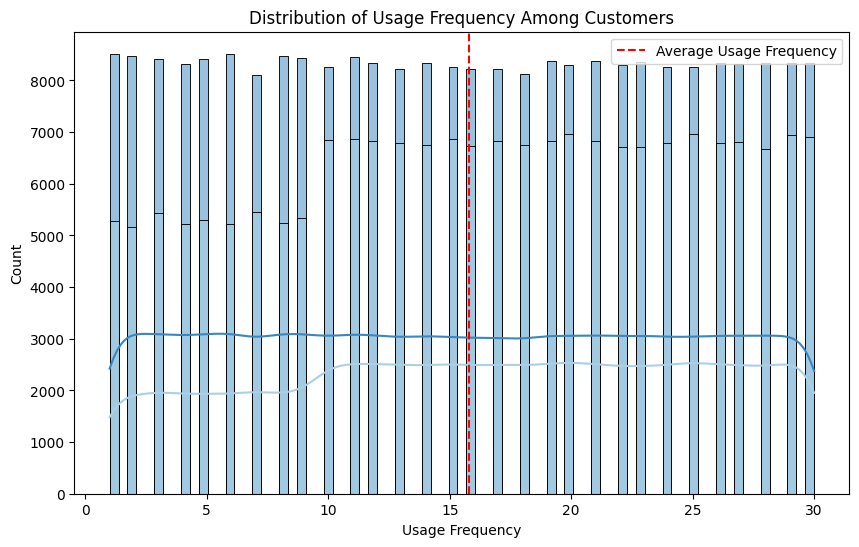

In [27]:
average_usage_frequency = df.Usage_Frequency.mean()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Usage_Frequency',hue = 'Churn', kde=True, palette='Blues')
plt.axvline(average_usage_frequency, color='red', linestyle='dashed', label='Average Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.title('Distribution of Usage Frequency Among Customers')
plt.legend()
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\2964675461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='Usage_Frequency', data=df, palette='Set2')


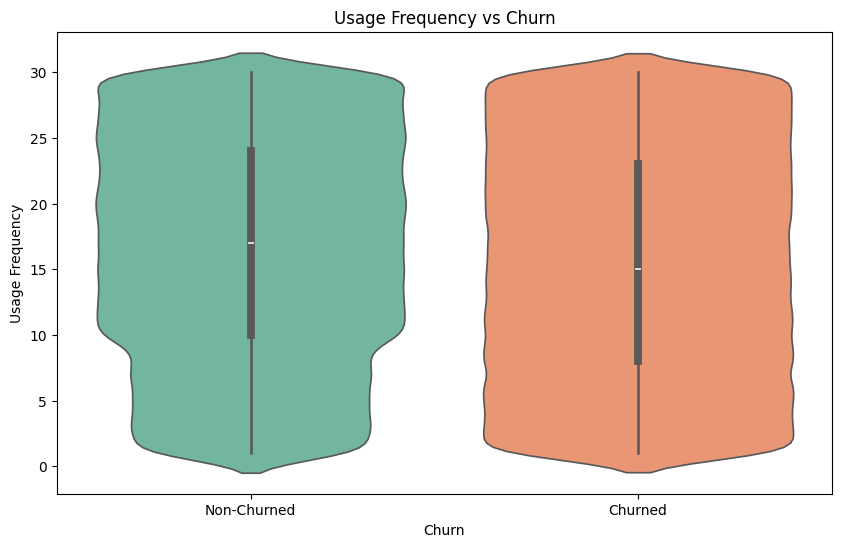

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Usage_Frequency', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.title('Usage Frequency vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

### Answers :
- the 2 first plots show that usage frequency is flat and has a uniform distribution meaning that the customers usage is on average 15

- the usage freqeuncy does not seem to affect churn , only slightly lower churn rates for 0 - 10 usage frequency

### 5.Support Calls and Churn :
- What is the average number of support calls made by customers?

- Is there any correlation between support calls and churn?

In [29]:
average_support_calls = df['Support_Calls'].mean()
print(f"Average Number of Support Calls: {average_support_calls}")

Average Number of Support Calls: 3.6044366107723578


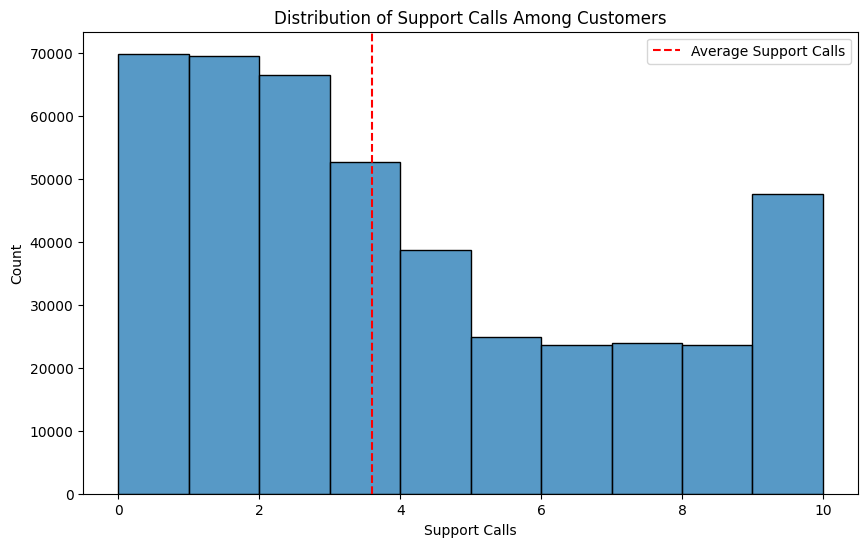

In [30]:
plt.figure(figsize = (10,6))
sns.histplot(data = df , x = 'Support_Calls' , bins = 10  )
plt.axvline(average_support_calls, color='red', linestyle='dashed', label='Average Support Calls')
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title('Distribution of Support Calls Among Customers')
plt.legend()
plt.show()

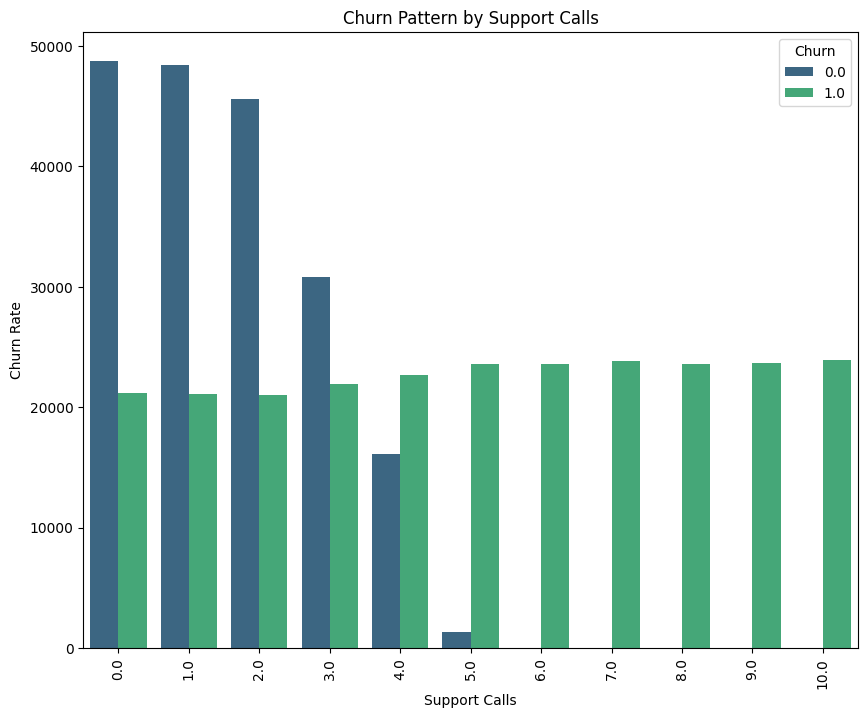

In [31]:
plt.figure(figsize = (10,8))
sns.countplot(data = df , x = 'Support_Calls' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Support Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Support Calls')
plt.xticks(rotation=90)
plt.show()

### Answers :
- on average customers call the support 3 times

- support calls are much higher from 0 to 3 times for each customer and in this range the calls seem to be successful due to the churn rate of this customers

- as the support calls go higher the churn rates go higher too, to the point that for more than 5 calls there are no non churned customers and it seems the supporters are not successful in making the cutomer's problem go away

### 6.Payment Delay :
- What is the typical payment delay among customers?

- Does payment delay influence churn behavior?

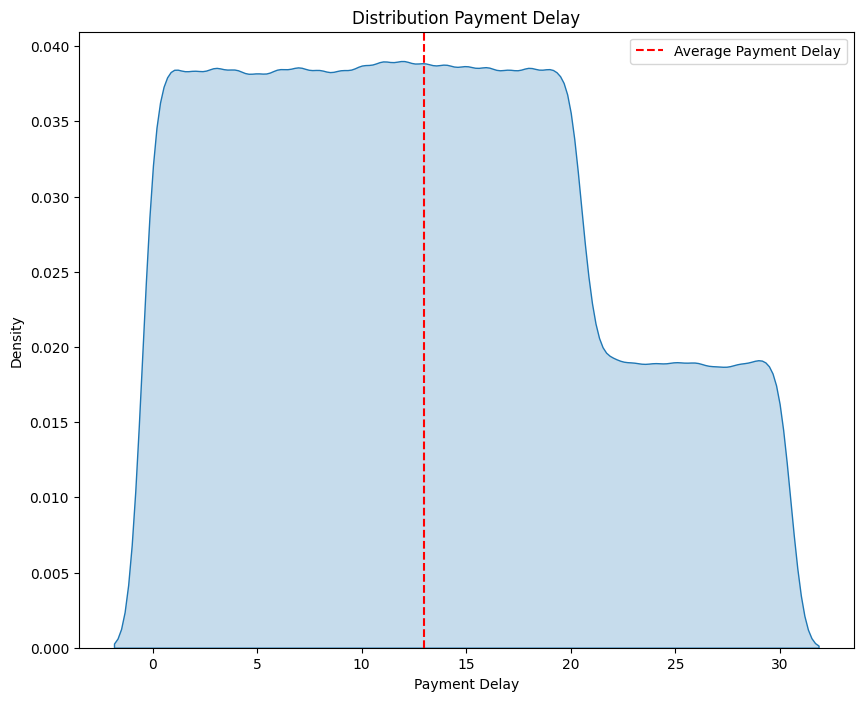

In [32]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Payment_Delay' , fill = True)
plt.title('Distribution Payment Delay')
avg_payment_delay = df.Payment_Delay.mean()
plt.xlabel('Payment Delay')
plt.axvline(avg_payment_delay , color = 'red' , linestyle = 'dashed' , label = 'Average Payment Delay')
plt.legend()
plt.show()

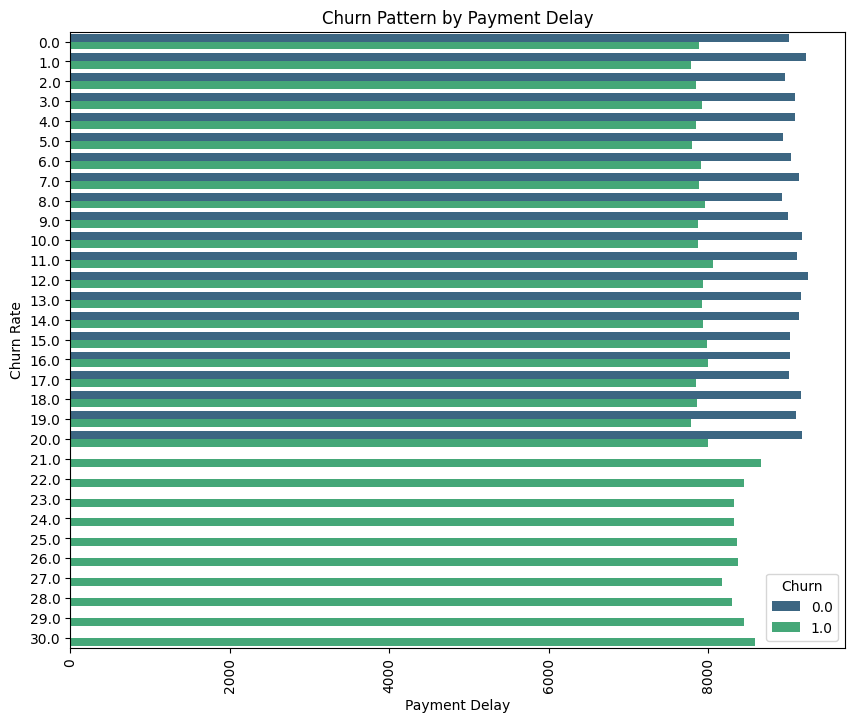

In [33]:
plt.figure(figsize = (10,8))
sns.countplot(data = df , y = 'Payment_Delay' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Payment Delay')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Payment Delay')
plt.xticks(rotation=90)
plt.show()


### Answers :
- The payment Delay is normally distributed and slightly positively skewed

- the churn rate is too high from 0 to 20 but drops significantly after 20 month of payment dela

### 7.Subscription Type and Contract Length
- What are the different subscription types and their proportions?

- Do customers with different subscription types have different churn rates?

- How does contract length relate to churn?

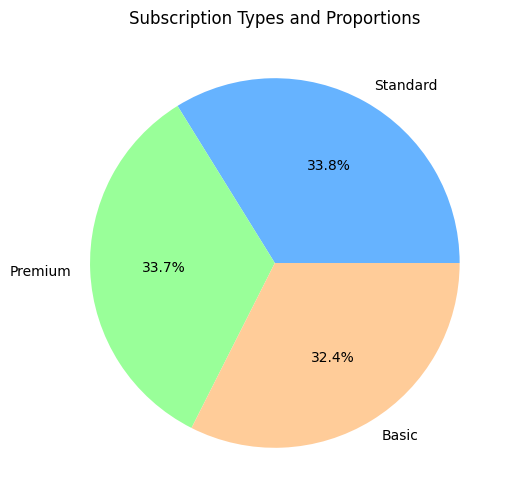

In [34]:
plt.figure(figsize=(6, 6))
subscription_counts = df['Subscription_Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Subscription Types and Proportions')
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\2476198504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='pastel')


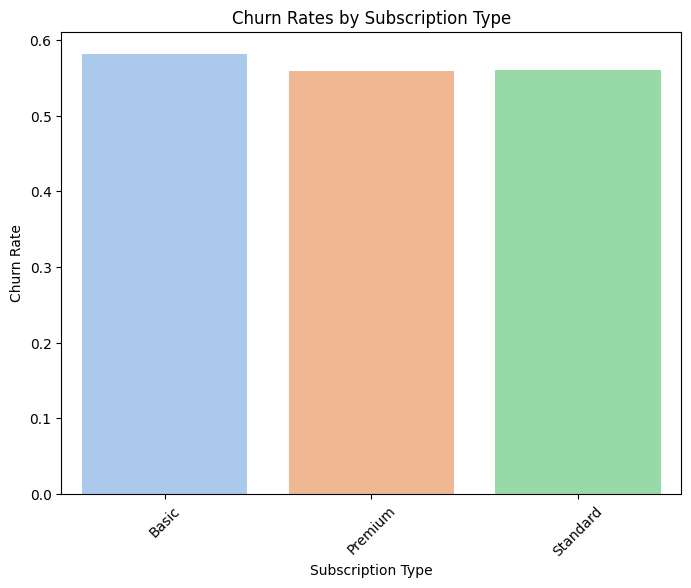

In [35]:
plt.figure(figsize=(8, 6))
subscription_churn_rate = df.groupby('Subscription_Type')['Churn'].mean()
sns.barplot(x=subscription_churn_rate.index, y=subscription_churn_rate.values, palette='pastel')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Subscription Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\1480949907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract_Length', y='Churn', data=df, palette='Set3')


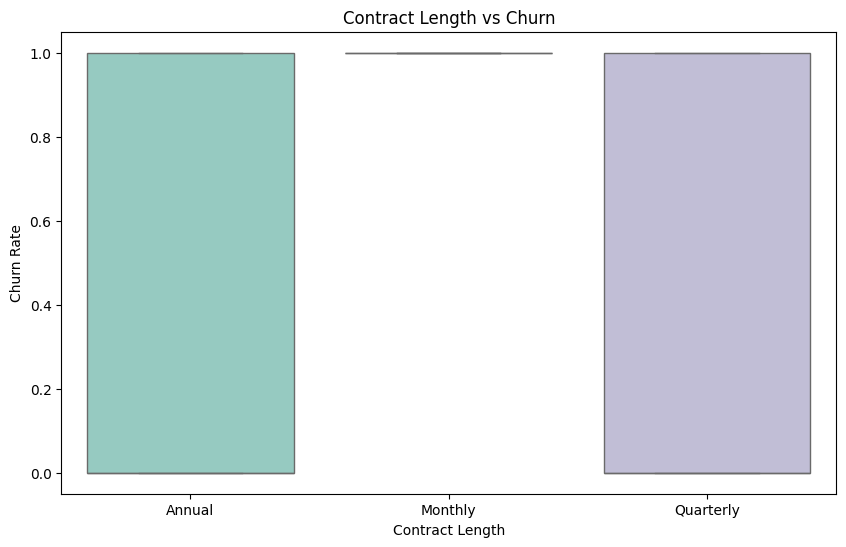

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract_Length', y='Churn', data=df, palette='Set3')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.title('Contract Length vs Churn')

plt.show()

In [37]:
df[(df['Contract_Length'] == 'Monthly') & (df['Churn'] == 0)]

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,AgeGroup


### Answers :
- The subscription types have eqaul proportions of the data

- The churn rate among the subscription types is also equal

- almost half of customers with annual and quarterly contracts churn, but customers with monthly contracts all churn

### 8.Total Spend and Churn
- What is the average total spend of customers?

- Is there any correlation between total spend and churn?

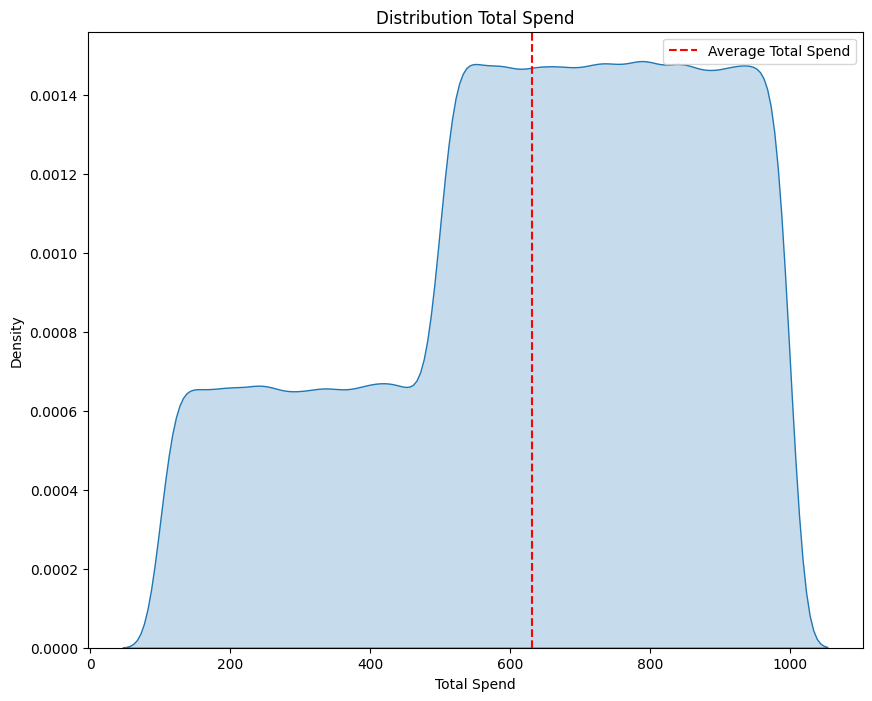

In [38]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Total_Spend' , fill = True )
plt.title('Distribution Total Spend')
avg_total_spend = df.Total_Spend.mean()
plt.xlabel('Total Spend')
plt.axvline(avg_total_spend , color = 'red' , linestyle = 'dashed' , label = 'Average Total Spend')
plt.legend()
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\3676826545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total_Spend', data=df, palette='Set2')


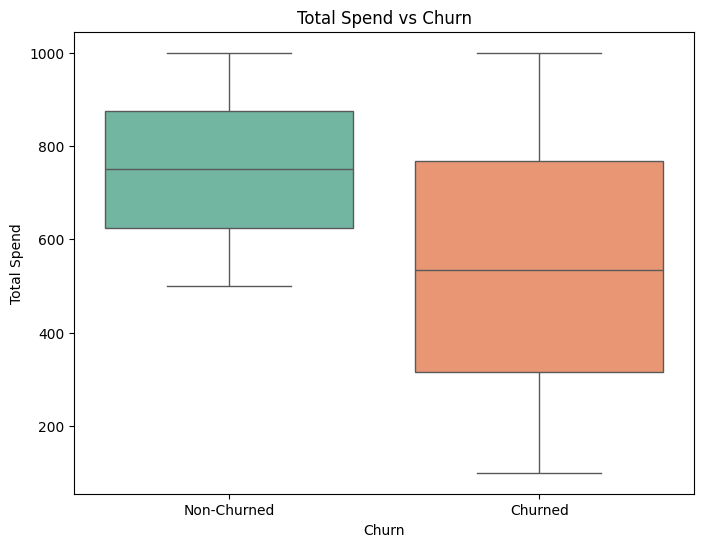

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total_Spend', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.title('Total Spend vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

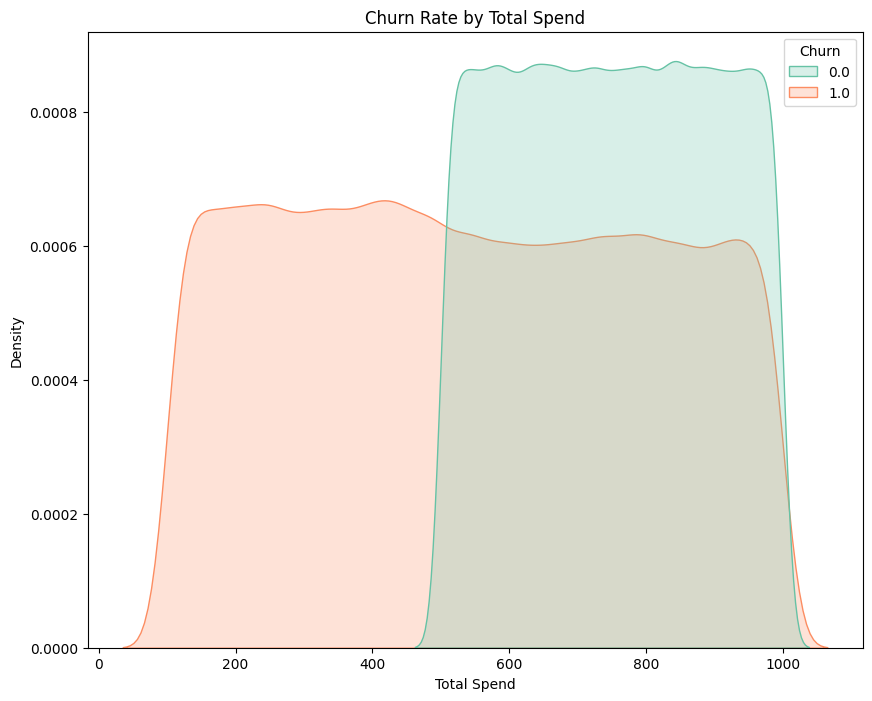

In [40]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Total_Spend' ,hue = 'Churn', fill = True , palette = 'Set2')
plt.title('Churn Rate by Total Spend')
plt.xlabel('Total Spend')
plt.show()

### Answers :
- each customer on average spends about 650$

- most customers with who spend more than 500$ tend not to churn

### 9.Last Interaction
- How recently did customers interact with your service?

- Is there any connection between the recency of the last interaction and churn?

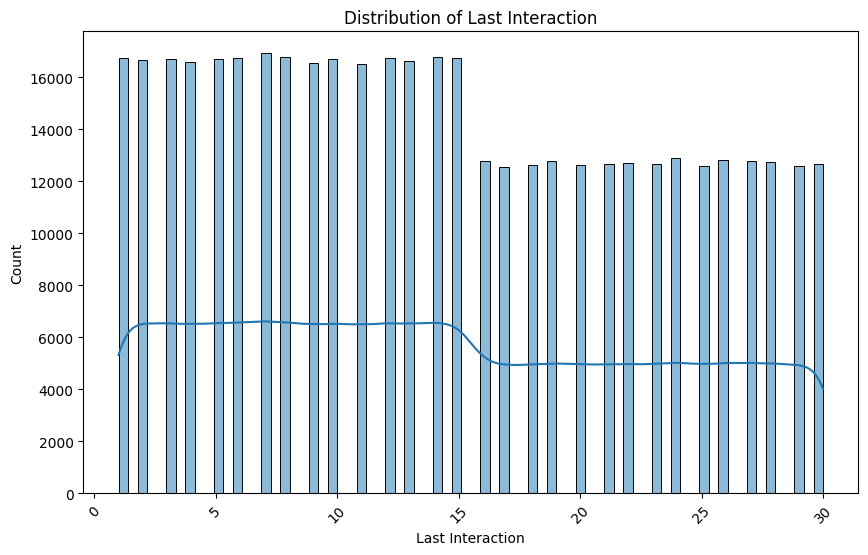

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Last_Interaction', kde=True)
plt.xlabel('Last Interaction')
plt.ylabel('Count')
plt.title('Distribution of Last Interaction')
plt.xticks(rotation=45)
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\3614262196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='Last_Interaction', data=df, palette='Set3')


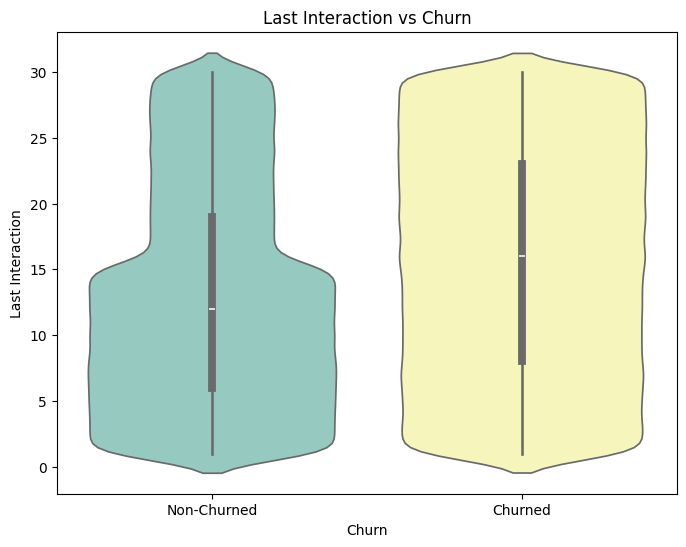

In [42]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Last_Interaction', data=df, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Last Interaction')
plt.title('Last Interaction vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

### Answers :
- Last ineteraction of customers has a uniform disribution but just slightly higher from 0 to 15

- the churn rate by last inetraction shows no significant differennce so last inetraction has no or little impact on churn rate

### 10.Churn Analysis (Target Variable)
- What is the overall churn rate in your dataset?

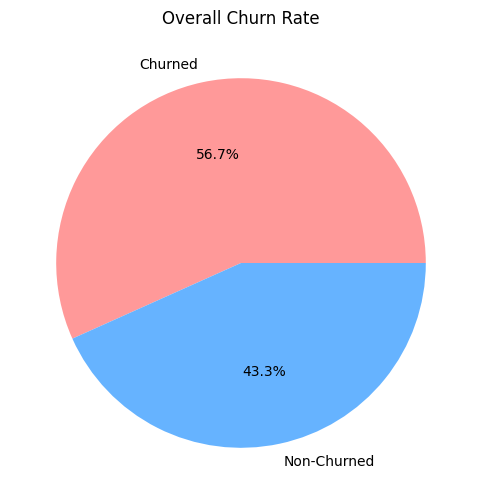

In [43]:
overall_churn_rate = df['Churn'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie([overall_churn_rate, 100 - overall_churn_rate], labels=['Churned', 'Non-Churned'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Overall Churn Rate')
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\2902409759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


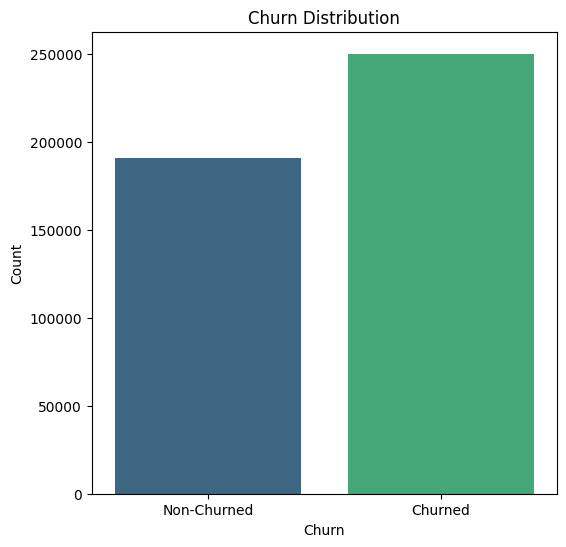

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

### Answers :
- by analysing the target variable (Churn) we can see that most customers of our shop are churning!

### 11.Correlations
- Are there any notable correlations between different features and churn?

- Could multicollinearity between features affect your analysis?

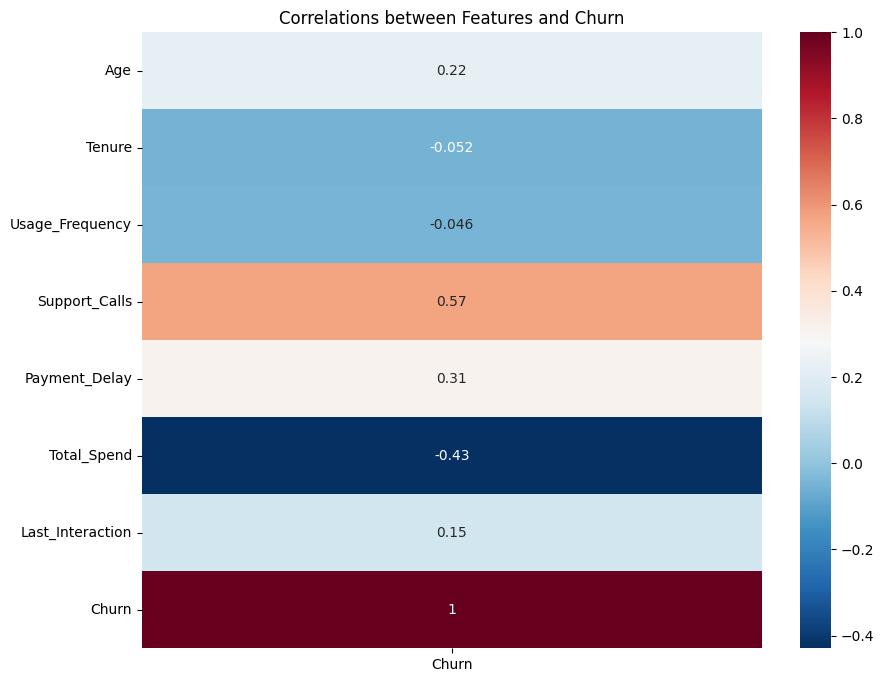

In [45]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']], annot=True, cmap='RdBu_r')
plt.title('Correlations between Features and Churn')
plt.show()

C:\Users\shwet\AppData\Local\Temp\ipykernel_15464\1792648328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')


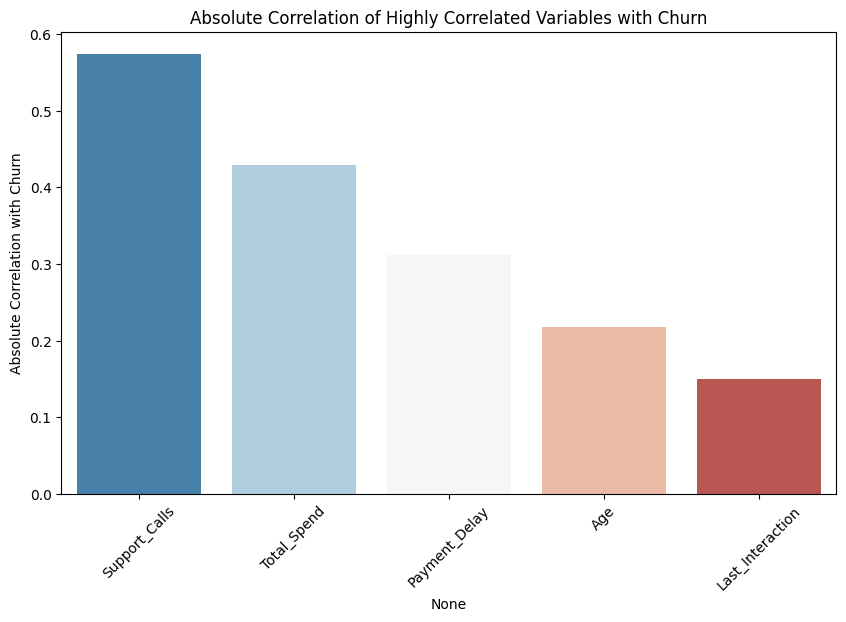

In [46]:
high_corr_vars = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Absolute Correlation of Highly Correlated Variables with Churn')
plt.xticks(rotation=45)
plt.show()

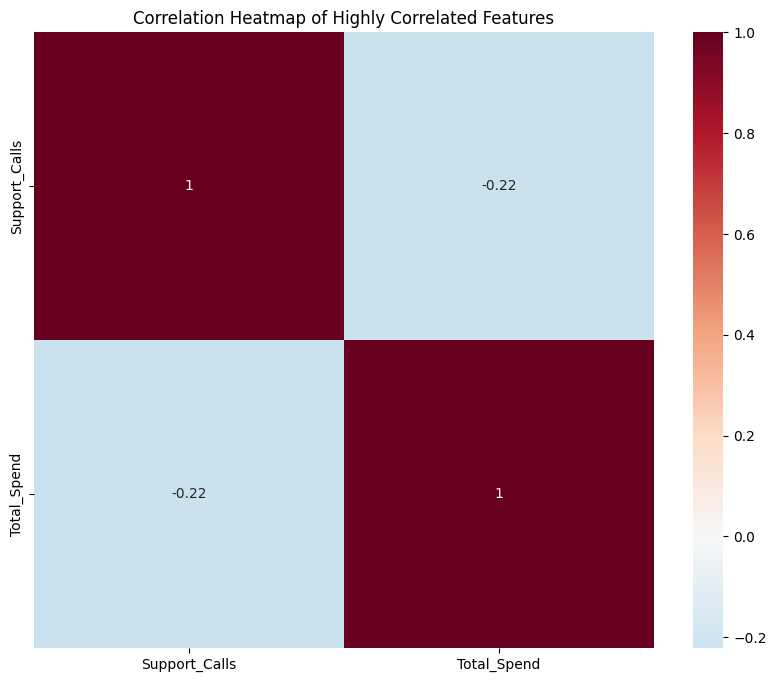

In [47]:
corr_matrix = df.drop(columns=['Churn']).corr(numeric_only=True)

high_corr_features = []
for column in corr_matrix.columns:
    max_corr = corr_matrix[column].drop(index=column).abs().max()
    if max_corr > 0.2:
        high_corr_features.append(column)

plt.figure(figsize=(10, 8))
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of Highly Correlated Features')
plt.show()

### Answers :
- from the first plot we realize that support calls feature has the highest correlation with Churn

- The second plot shows the features that have the highest correlation with the target variable (Churn)

- The third plot shows the highly correlated features except for Churn

In [48]:
df

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn,AgeGroup
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,31-40
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,61+
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,51-60
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,51-60
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...
440827,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,41-50
440828,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,21-30
440829,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,21-30
440830,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,21-30


In [49]:
df.to_csv('Customer_Churn_dataset(EDA.part1).csv', index = False)